 # Classification de données avec un SVM et noyau RBF

### Chargement des bibliothèques nécessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Chargement de la base de données Iris

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # On prend seulement les deux premières caractéristiques pour la visualisation
y = iris.target

### Normalisation des données

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Séparation en train/test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Entraînement du SVM avec noyau RBF

In [5]:
svm = SVC(kernel='rbf', C=10, gamma=1)
svm.fit(X_train, y_train)

SVC(C=10, gamma=1)

### Entraînement du SVM avec noyau RBF modification des paramètres 

In [6]:
svm2 = SVC(kernel='rbf', C=1, gamma=0.1)
svm2.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

### Prédictions

In [7]:
y_pred = svm.predict(X_test)
y_pred2 = svm2.predict(X_test)

### Calcul de la matrice de confusion

In [8]:
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred2)

### Fonction d'affichage de la matrice de confusion

In [9]:
def afficher_matrice_confusion(cm, labels):
    """Affiche la matrice de confusion sous forme de heatmap."""
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title('Matrice de Confusion')
    plt.show()


### Fonction d'affichage de la frontière de décision

In [10]:
def afficher_frontiere_decision(X, y, model, feature_names):
    """Affiche la frontière de décision du modèle SVM sur les deux premières caractéristiques."""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("SVM RBF sur Iris (2 premières caractéristiques)")
    plt.show()

### Affichage des résultats

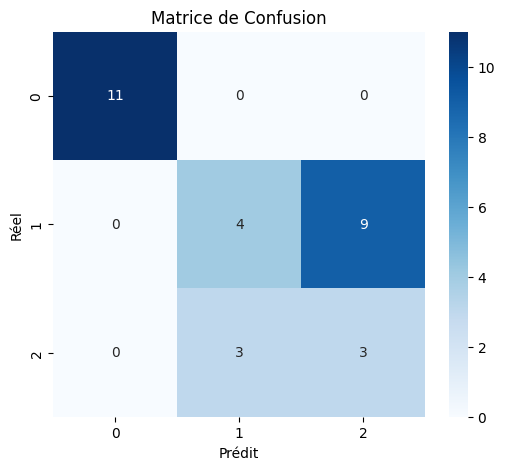

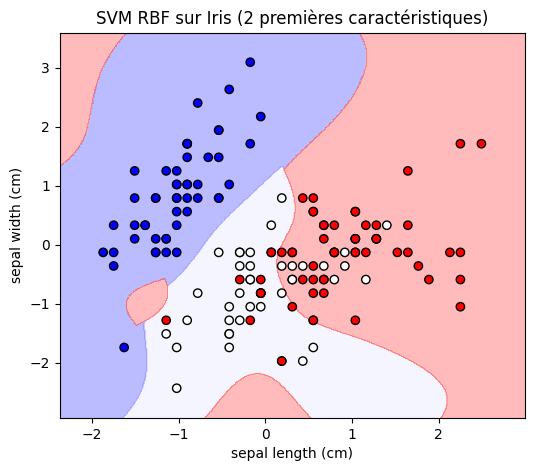

In [11]:
afficher_matrice_confusion(cm, np.unique(y))
afficher_frontiere_decision(X, y, svm, iris.feature_names)

### Affichages des résultats avec les paramètres modifiés

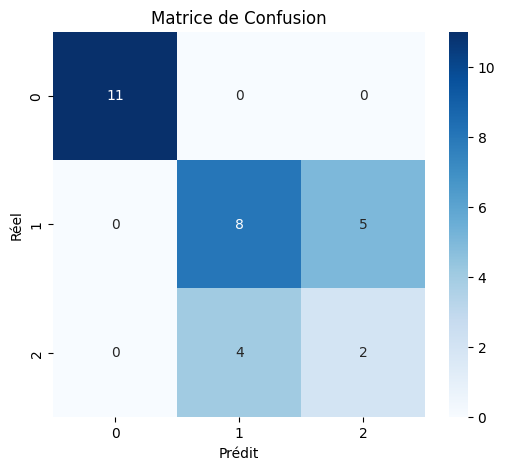

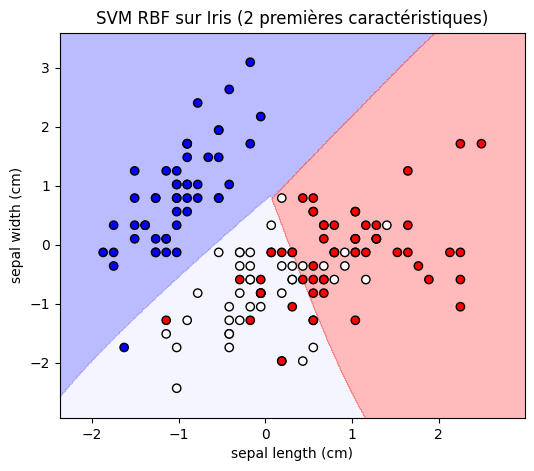

In [12]:
afficher_matrice_confusion(cm2, np.unique(y))
afficher_frontiere_decision(X, y, svm2, iris.feature_names)

Ici, on a un modèle plus souple qui n'as pas subis de sur-apprentissage mais plutôt du sous apprentissage. On remarque que le modèle arrive toujours à bien séparer les points bleu mais toujours pas les points rouges et blancs. Néanmoins la séparation en 3 zones distinctes permet une classification plus "simple" que le premier modèle